<a href="https://colab.research.google.com/github/hoseinm444/googleColab_works/blob/machine_learning_exersise/machine_learning/session16_17_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# stratified sampling
درصد یکسانی از داده ها هم در تست باشد هم در ترین
برای جلوگیری از sampling bias

##session16

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv("housing.csv")

In [ ]:
pd.cut(df["median_income"], bins=[0.0,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])

###result
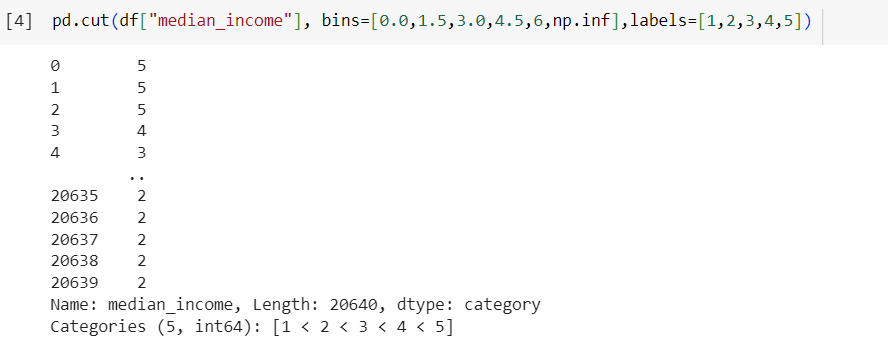

In [ ]:
df["median_income_categories"] =pd.cut(df["median_income"], bins=[0.0,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])

In [ ]:
df["median_income_categories"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: median_income_categories, dtype: int64

In [ ]:
df["median_income_categories"].value_counts().plot.bar()

###result
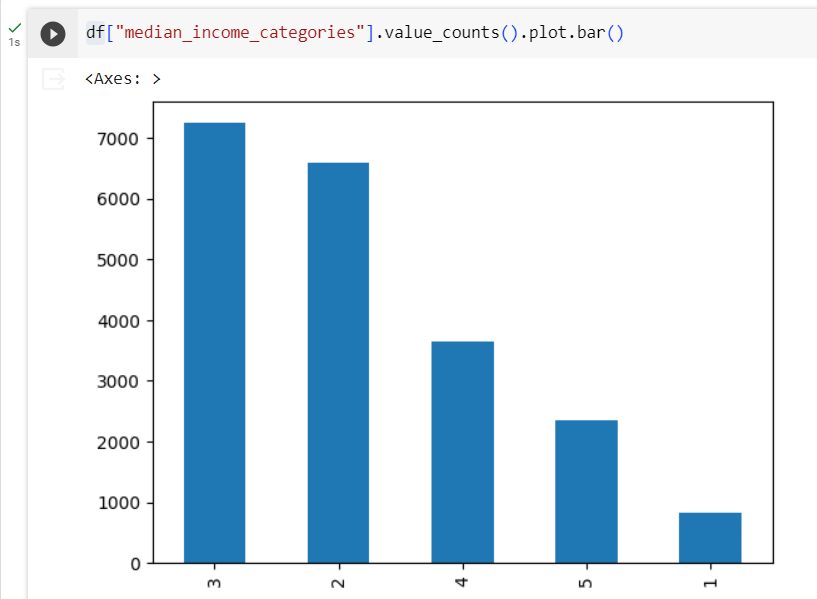

In [ ]:
df["median_income_categories"].value_counts().sort_index().plot.bar()

In [ ]:
df["median_income_categories"].value_counts().plot.bar(grid=True)

###result
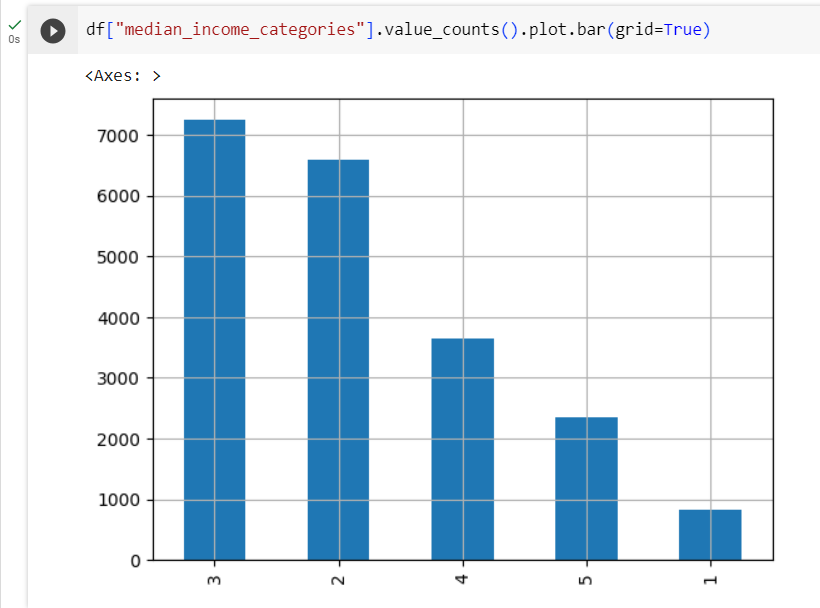

##session 17:


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss=StratifiedShuffleSplit(n_splits= 10,test_size = 0.2,random_state= 40)
stratified_split= []
for train_index , test_index in sss.split(df,df["median_income_categories"]):
   stratified_train_set_n =df.iloc[train_index]
   stratified_test_set_n =df.iloc[test_index]
   stratified_split.append([stratified_test_set_n,stratified_test_set_n])

In [ ]:
stratified_split

[[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  5905     -118.42     34.29                34.0       1489.0           326.0   
  4830     -118.30     34.04                37.0       1470.0           399.0   
  10969    -117.87     33.76                37.0       4943.0           851.0   
  7048     -118.05     33.94                34.0        495.0           120.0   
  13721    -117.18     34.07                 7.0       1347.0           301.0   
  ...          ...       ...                 ...          ...             ...   
  3377     -118.29     34.25                19.0       1988.0           594.0   
  19816    -119.29     36.54                18.0       2581.0           628.0   
  20545    -121.75     38.55                26.0       4802.0           950.0   
  3330     -122.48     38.90                10.0        304.0            63.0   
  14222    -117.04     32.66                22.0       3362.0           630.0   
  
         population  hous

###در سلول قبلی من ۱۰ جفت داده تست و ترین خواهم داشت که من فقط اولی یعنی اندیس ۰ را بر می دارم

In [ ]:
stratified_train_set,stratified_test_set = stratified_split[0]

###درصد لیبل ها با این طبقه بندی ها یکسان است یا خیر؟

In [ ]:
stratified_test_set["median_income_categories"].value_counts()/len(stratified_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: median_income_categories, dtype: float64

###با خود تابع train_test_split می توان کارهای بالا را انجام

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
str_train_set, str_test_set= train_test_split(df,
                                              test_size = 0.2,
                                              stratify=  df["median_income_categories"],
                                              random_state= 40)


##session18:visualization

ما ستون median_income_category  را فقط برای تعیین دسته بندی ترین و تست نیاز داشتیم و بعد از آن باید آن ها ار از داده ها حذف کنیم .


In [ ]:
str_train_set =str_train_set.drop("median_income_categories",axis=1)
str_test_set =str_test_set.drop("median_income_categories",axis=1)

In [ ]:
train=str_train_set

In [ ]:
train

In [ ]:
sns.scatterplot(data= train, x= "longitude", y= "latitude")

###result:
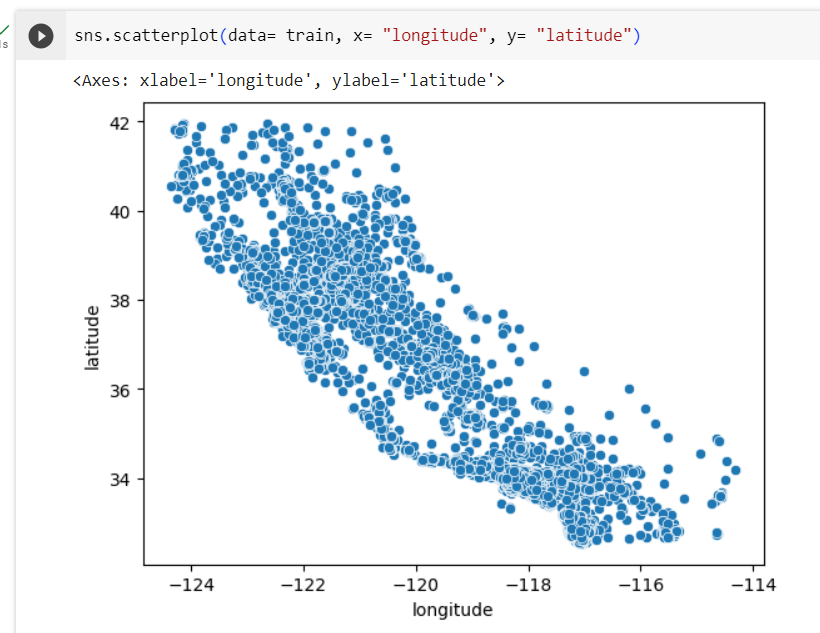

In [ ]:
sns.scatterplot(data= train,
                x= "longitude",
                y= "latitude",
                size="population",
                alpha=0.2)

###result:
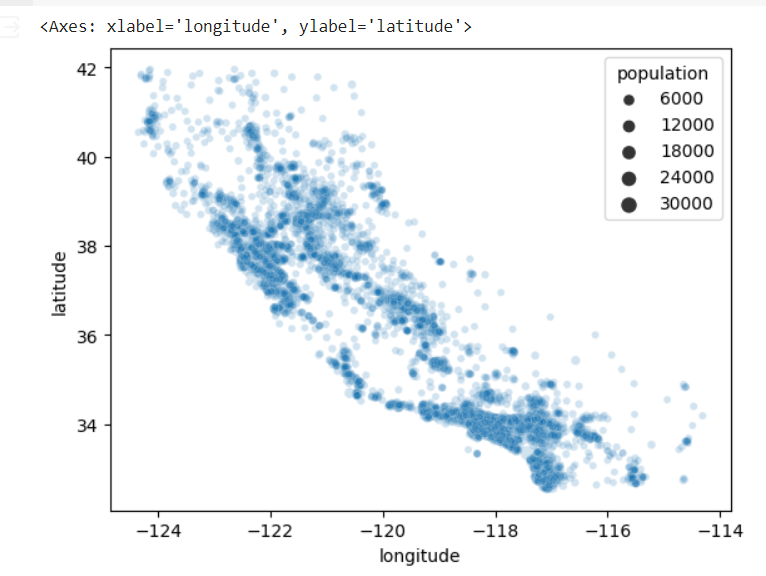

In [ ]:
sns.scatterplot(data= train,
                x= "longitude",
                y= "latitude",
                size="population",
                alpha=0.2,
                hue="median_house_value")

In [ ]:
ax=sns.scatterplot(data= train,
                x= "longitude",
                y= "latitude",
                size="population",
                alpha=0.2,
                hue="median_house_value")
sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))

###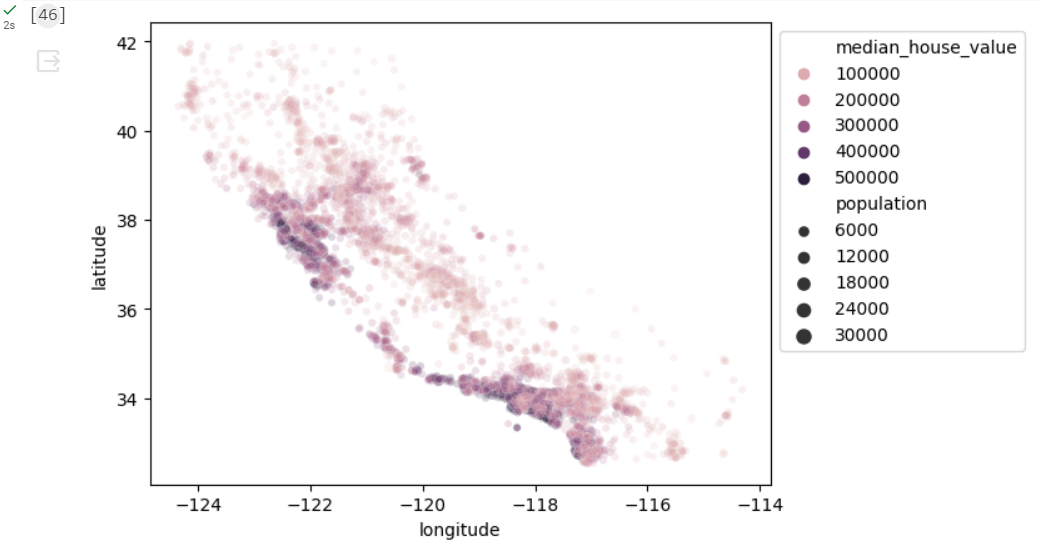

###مصور سازی متناسب با داده ای که داریم